# Домашнее задание «деревья решений»
Преподаватель: Алексей Миронов, Наталья Баданина, Дарья Максимова

См. материалы к занятию.

Для выполнения домашнего задания необходимо взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество).


# Imports

In [9]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import export_graphviz
from warnings import filterwarnings
filterwarnings('ignore')

# Load data

In [10]:
from sklearn.datasets import load_boston
load_boston().filename

'/home/dmi/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/boston_house_prices.csv'

In [11]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston().filename, skiprows=1)
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [12]:
y = data.MEDV
X = data.drop('MEDV', 1)
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [13]:
X = X[y != 50]
X_columns = X.columns
y = y[y != 50]

# DecisionTreeRegressor

In [14]:
tree_params = {'criterion': 'mse',
              'splitter': 'best',
              'max_depth': None,
              'min_samples_split': 2,
              'min_samples_leaf': 1,
              'min_weight_fraction_leaf': 0.0,
              'max_features': None,
              'max_leaf_nodes': None,
              'min_impurity_decrease': 0.0,
              'min_impurity_split': None,
              'presort':'deprecated',
              'ccp_alpha': 0.0,}

def learn(X, y, tree_params, polyfeatures=False, random=42):
    score = []
    if polyfeatures:
        poly = PolynomialFeatures()
        poly_X = poly.fit_transform(X)
        X = pd.DataFrame(poly_X, columns=poly.get_feature_names())
        
    for n, (train, test) in enumerate(KFold(n_splits=5, random_state=random, shuffle=True).split(y)):
        reg = DecisionTreeRegressor(random_state=random, **tree_params).fit(X.iloc[train], y.iloc[train])
        #reg = LinearRegression(normalize=True).fit(X.iloc[train], y.iloc[train])
        
        sc = reg.score(X.iloc[test], y.iloc[test])
        score.append(sc)
        print(f'Fold {n}, R^2 coeff = {sc}')
    print(f'mean R^2 = {np.array(score).mean()}')
learn(X, y, tree_params)

Fold 0, R^2 coeff = 0.8165315553300648
Fold 1, R^2 coeff = 0.7667579311537824
Fold 2, R^2 coeff = 0.7399543475271577
Fold 3, R^2 coeff = 0.7385222213773869
Fold 4, R^2 coeff = 0.7669633589043618
mean R^2 = 0.7657458828585507


Параметры по умолчанию

Для линейной регрессии R^2=0.753 

Для дерева решений R^2=0.7657

In [15]:
tree_params = {'criterion': 'mae',
              'splitter': 'best',
              'max_depth': 4, # Максимальная глубина дерева
              'min_samples_split': 2, # Минимальный размер выборки для разделения
              'min_samples_leaf': 1, # Минимальный размер выборки в листе
              'min_weight_fraction_leaf': 0.0,
              'max_features': None, # Количество фичей для поиска сплита
              'max_leaf_nodes': 20,
              'min_impurity_decrease': 0,
              'ccp_alpha': 0,} # Параметр характеризующий прунинг
learn(X, y, tree_params, polyfeatures=False)
# 0.7876078508763624

Fold 0, R^2 coeff = 0.7868348592242076
Fold 1, R^2 coeff = 0.845552201712032
Fold 2, R^2 coeff = 0.71706357427694
Fold 3, R^2 coeff = 0.8208613715491336
Fold 4, R^2 coeff = 0.7677272476194987
mean R^2 = 0.7876078508763624


## Итого:
Параметры по умолчанию R^2=0.7657

Подобранные параметры R^2=0.7876

## Важность признаков

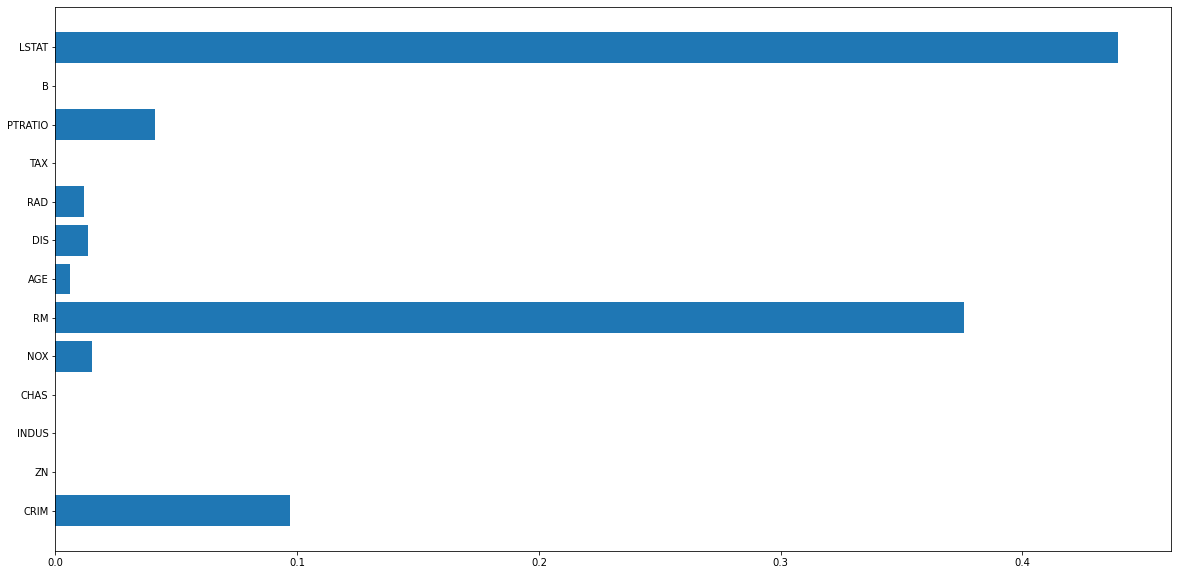

In [25]:
reg = DecisionTreeRegressor(random_state=42, **tree_params).fit(X, y)

plt.figure(figsize=(20,10))
plt.barh(np.arange(len(reg.feature_importances_)), reg.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns);

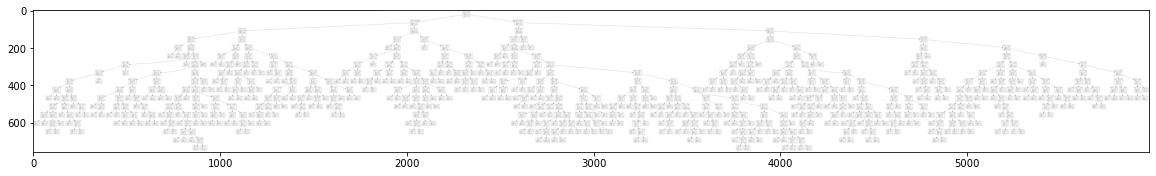

In [27]:
# 
import cv2
plt.figure(figsize=(20,10))
img = cv2.imread('/media/dmi/5F9CFB7847A8B8FE/netology/feature_engenireeng/trees/webgraphviz.png')
plt.imshow(img);